In [1]:
# Necessary import
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# load data from .csv files
person = pd.read_csv('person.csv')
membership = pd.read_csv('membership.csv')
stat = pd.read_csv('stat.csv')

In [27]:
person.head()

,id,firstName,lastName,matchName,type,position,lastUpdated,nationality,nationalityId,dateOfBirth,placeOfBirth,countryOfBirthId,countryOfBirth,height,weight,gender,status,foot,age,lastUpdated_year
0,dkh5rfgsoiovvuackx9o5svrp,Dawid,Smug,D. Smug,player,Goalkeeper,2018-11-17 18:58:14+00:00,Poland,27baqb7359ywdvsxxklx1kn11,1994-01-14,Konin,27baqb7359ywdvsxxklx1kn11,Poland,194.0,85.0,Male,active,NaN,26.0,2018
1,2m1fi26tv277k17l9v89uux1x,Sadiq,Quliyev,S. Quliyev,player,Defender,2018-12-09 12:31:37+00:00,Azerbaijan,52sufqqq7vid3xa6iljx6obcz,1995-03-09,NaN,52sufqqq7vid3xa6iljx6obcz,Azerbaijan,NaN,NaN,Male,active,NaN,25.0,2018
2,5ojtb45gyd00i0chyku6btuxh,Jaime José,Moreno Ciorciari,J. Moreno,player,Attacker,2018-12-10 05:46:18+00:00,Nicaragua,4of7fctqcqbj3rai95vd4jk26,1995-03-30,Puerto La Cruz,1er0616j12s9yghuzvsx76d5v,Venezuela,183.0,82.0,Male,active,NaN,25.0,2018
3,2w0vvlgz7ib4f2dvkinycj55h,Leandro,Leite Mateus,Leandro Leite,player,Midfielder,2018-11-24 20:01:10+00:00,Brazil,2vufyvpoxd9lfl9f6vpp7tz6y,1982-12-27,Piracanjuba,2vufyvpoxd9lfl9f6vpp7tz6y,Brazil,181.0,75.0,Male,active,right,38.0,2018
4,eyas8ovmtmcmkilzd9lox4hxx,Sergey,Balanovich,S. Balanovich,player,Midfielder,2018-12-02 15:31:47+00:00,Belarus,2vn7xzv9g752y1h5ufjzr27i8,1987-08-29,Pinsk,2vn7xzv9g752y1h5ufjzr27i8,Belarus,176.0,70.0,Male,active,right,33.0,2018


In [56]:
person.loc[person['dateOfBirth'] == '1986-4-10']
membership.loc[membership['contestantName'] == 'Huddersfield Town FC']

,id,contestantId,contestantType,contestantName,active,startDate,endDate,role,type1,transferType
2059,14jewryyd0elm65ci5puleytx,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2015-08-27,2016-06-01,player,men,Loan
3675,1871917dpg5or9ldjozdn2or9,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2016-01-08,2016-04-10,player,men,Loan
4578,1a8msufvkrt37kx8px3oe4lp1,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2011-07-01,2014-06-30,player,men,Free Transfer
6386,1dnbshcb3l4r4i3ely6r0f26t,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2006-07-01,2007-08-01,player,men,NaN
9960,1l12v8lx25ipy5obp0wcfkr11,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,yes,2018-01-12,2019-01-01,player,men,Transfer
...,...,...,...,...,...,...,...,...,...,...
238201,ezkzz0hfih8gq05vfvnt2kvyt,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,yes,2016-07-01,2019-01-01,player,men,Free Transfer
239733,f3eag9fqk10t41t1kp14lumz9,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2012-09-01,2013-01-13,player,men,Loan
239734,f3eag9fqk10t41t1kp14lumz9,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2013-07-01,2015-01-09,player,men,Back from Loan
239735,f3eag9fqk10t41t1kp14lumz9,5n5baro467i8s8efkra3nhgux,club,Huddersfield Town FC,no,2015-07-01,2015-08-31,player,men,Back from Loan


# Clean person.csv

In [3]:
person = person.loc[person['type'] == 'player']
print('The number of remaining rows is {}'.format(person.shape[0]))
person = person.drop_duplicates()
print('The duplicates are dropped, the shape afterward is {}.'.format(person.shape))

The number of remaining rows is 44201
The duplicates are dropped, the shape afterward is (44200, 18).


In [4]:
person['dateOfBirth'] = pd.to_datetime(person['dateOfBirth'])
person['lastUpdated'] = pd.to_datetime(person['lastUpdated'])
# person.head()

Text(0.5, 1.0, 'Ages Distribution')

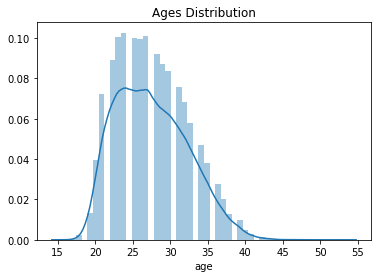

In [5]:
# add a column about the ages.
person['age'] = 2020 - person['dateOfBirth'].dt.year

# add a column about the year of late update.
person['lastUpdated_year'] = person['lastUpdated'].dt.year

# distplot of ages
chart = sns.distplot(person['age'])
chart.set_title('Ages Distribution')

# person.describe()

# Clean membership.csv

In [6]:
membership = membership.drop_duplicates()
membership = membership.loc[membership['role']=='player']
print('The shape afterward is {}.'.format(membership.shape))

The shape afterward is (250305, 10).


In [7]:
membership.loc[membership['active']=='yes', 'endDate'] = '2019-1-1'
membership = membership.dropna(subset = ['endDate']) # drop nan data
print('There are {} rows left'.format(membership.shape[0]))
# membership.head()

There are 247915 rows left


In [8]:
#membership.loc[membership['endDate']=='201-05-04']
membership.loc[membership['startDate']=='0201-05-04', 'startDate'] = '2010-05-04'
membership.loc[membership['startDate']=='0011-01-01', 'startDate'] = '2011-01-01'

membership.loc[membership['endDate']=='0010-12-30', 'endDate'] = '2010-12-30'
membership.loc[membership['endDate']=='0201-04-15', 'endDate'] = '2010-04-15'
membership.loc[membership['endDate']=='0204-08-01', 'endDate'] = '2004-08-01'

membership['startDate'] = pd.to_datetime(membership['startDate'])
membership['endDate'] = pd.to_datetime(membership['endDate'])
# membership.head()

# Clean stat.csv

In [9]:
stat = stat.drop_duplicates()
print('The shape afterward is {}.'.format(stat.shape))

The shape afterward is (750230, 19).


In [10]:
stat.loc[stat['penaltyGoals'] == 58, 'penaltyGoals'] = 0

In [11]:
stat.loc[stat['minutesPlayed'] < 0, 'minutesPlayed'] =  abs(stat['minutesPlayed'])

# Select Data

In [63]:
#!/user/local/bin/python2.7
# -*- coding:utf-8 -*-
import os
def mkdir(path):
    # remove space
    path=path.replace(' ','')
    # remove \\
    path=path.rstrip("\\")
    # check if path exists
    isExists=os.path.exists(path)
    
    if not isExists:
        # if does not exist, create the folder
        '''
        os.mkdir(path)与os.makedirs(path)的区别是,当父目录不存在的时候os.mkdir(path)不会创建，os.makedirs(path)则会创建父目录
        '''
        #coding as utf-8
        os.makedirs(path) 
        print (path+'is successfully created')
        return True
    else:
        # if exists, create nothing
        print (path+' already exists')
        return False

In [64]:
def team_select(team, season):
    year = int(season[0:4])
    
    # select membership
    membership_team = membership.loc[(membership['contestantName'] == team)&((membership['startDate'].dt.year <= year)&(membership['endDate'].dt.year > year))]
    
    # select players
    person_team = person.loc[person['id'].isin(membership_team['id'])]
    
    # adjust player ages for the selected season
    person_team['age'] = person_team['age'] - (2020 - int(season[5:9]))
    
    # select stats
    stat_team = stat.loc[(stat['id'].isin(membership_team['id'])) & ((stat['tournamentCalendarName'] == season)|(stat['tournamentCalendarName'] == season[5:9]))&(stat['isFriendly'] == 'no')]
    
    # set minutes played for team members
    person_team['minutesPlayed'] = person_team.id.apply(lambda x: np.sum(stat_team.loc[stat_team['id'] == x]['minutesPlayed']))
    
    # select 16 players (at most)
    time_sort = np.sort(person_team['minutesPlayed'])
    time_sort = time_sort[::-1]
    if time_sort.shape[0] >= 16:
        team_size = 16
    else:
        team_size = time_sort.shape[0]

    person_team = person_team.loc[person_team['minutesPlayed'] >= time_sort[team_size-1]]
    
    # sort players by nationality
    group_nation = person_team.groupby('nationality')
    p = pd.DataFrame()
    for group_name, group_df in group_nation:
        p = pd.concat([p,group_df])
    person_team = p
    
    # update membership and stat
    membership_team = membership.loc[membership['id'].isin(person_team['id'])]
    stat_team = stat_team.loc[stat_team['id'].isin(person_team['id'])]
    
    # select all the club memberships
    membership_team = membership_team.loc[membership_team['contestantType'] == 'club']
    
    return membership_team, person_team, stat_team

In [65]:
def career_search(person, membership, season):
    seasons = [season]
    for i in range(1,10):
        year = int(season[5:9])-i
        s = str(year-1) + '/' + str(year)
        seasons.append(s)
    seasons = seasons[::-1]
    print('The seasons are from {} to {}'.format(seasons[0], seasons[9]))
    
    # filter membership
    start = int(seasons[0][0:4])
    end = int(seasons[9][5:9])
    membership = membership.loc[((membership['startDate'].dt.year >= start)&(membership['startDate'].dt.year <= end))|((membership['endDate'].dt.year >= start)&(membership['endDate'].dt.year <= end))]
    # print(membership['contestantName'].unique())
    
    col = np.append(['matchName'],seasons)
    career_paths = pd.DataFrame(columns = col) 
    team_names = []
    for i in person['id'].values:
        career = {'matchName': person.loc[person['id'] == i]['matchName'].values[0]}
        for s in seasons:
            year = int(s[0:4])
            m = membership.loc[(membership['id'] == i) & ((membership['startDate'].dt.year <= year) & (membership['endDate'].dt.year > year))]
            # print(m)
            m_name = m['contestantName'].values
            m_type = m['transferType'].values
            
            if m_name.shape[0]>1:
                m_name = m_name[0:1]
                
            if m_type.shape[0]>1:
                m_type = m_type[0:1]
                
            if m_name.shape[0]>=1:
                team_names.append(m_name[0])
            # print(m_name, m_type)
            if len(m_name) == 0:
                career[s] = '/'
            else:
                career[s] = str(m_name[0]) + ' (' + str(m_type[0]) + ')'
        career_paths = career_paths.append(career,ignore_index=True)
        # print(career)
        
    # transfer team_names into Series    
    # print(team_names)
    team_names = pd.Series(pd.Series(team_names).unique())
    return career_paths, team_names

In [66]:
def data_select(team, season):
    print('Selecting data about {} in season {} ...'.format(team, season))
    membership_team, person_team, stat_team = team_select(team, season)
    career_paths, team_names = career_search(person_team, membership_team, season)
    
    # output into csv files
    folder_path = 'Data_Selection/' + team + '_' + season[5:9]
    mkdir(folder_path)
    
    person_path = folder_path + '/' + "person_" + team + "_" + season[5:9] + ".csv"
    careerPath_path = folder_path + '/' + "careerPath_" + team + "_" + season[5:9] + ".csv"
    careerNames_path = folder_path + '/' + "careerNames_" + team + "_" + season[5:9] + ".csv"
    person_path = person_path.replace(" ", "")
    careerPath_path = careerPath_path.replace(" ", "")
    careerNames_path = careerNames_path.replace(" ", "")
    # print(person_path)
    person_team.to_csv(person_path, index=True, sep=',')
    career_paths.to_csv(careerPath_path, index=True, sep=',')
    team_names.to_csv(careerNames_path, index=True, sep=',')
    print('Data is successfully sorted out\n\n')
    return

season_target = '2018/2019'
team_target = ['Manchester City FC', 'Liverpool FC','Chelsea FC', 'Cardiff City FC', 'Fulham FC', 'Huddersfield Town FC' ]
for team in team_target:
    data_select(team, season_target)

Selecting data about Manchester City FC in season 2018/2019 ...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The seasons are from 2009/2010 to 2018/2019
Data_Selection/ManchesterCityFC_2019is successfully created
Data is successfully sorted out


Selecting data about Liverpool FC in season 2018/2019 ...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The seasons are from 2009/2010 to 2018/2019
Data_Selection/LiverpoolFC_2019is successfully created
Data is successfully sorted out


Selecting data about Chelsea FC in season 2018/2019 ...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The seasons are from 2009/2010 to 2018/2019
Data_Selection/ChelseaFC_2019is successfully created
Data is successfully sorted out


Selecting data about Cardiff City FC in season 2018/2019 ...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The seasons are from 2009/2010 to 2018/2019
Data_Selection/CardiffCityFC_2019is successfully created
Data is successfully sorted out


Selecting data about Fulham FC in season 2018/2019 ...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The seasons are from 2009/2010 to 2018/2019
Data_Selection/FulhamFC_2019is successfully created
Data is successfully sorted out


Selecting data about Huddersfield Town FC in season 2018/2019 ...


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The seasons are from 2009/2010 to 2018/2019
Data_Selection/HuddersfieldTownFC_2019is successfully created
Data is successfully sorted out


